In [1]:
# Jupyter Notebook Chapter 3 and 4 Exercises Program
# DSC 530
# Week 4
# EDA Assignment Week 4
# David Berberena
# 1/7/2024

# Program Start

# Exercise 3-1

# Code taken from the Exercise file to establish the correct dataset manipulation environment

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [2]:
import numpy as np

In [3]:
import nsfg
import first
import thinkstats2
import thinkplot

In [4]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


In [9]:
resp = nsfg.ReadFemResp()

In [13]:
# Construct actual PMF variable using NUMKDHH within ReadFemResp dataset to reflect 
# actual distribution for the number of children under 18 in the household

actual_pmf = thinkstats2.Pmf(resp.numkdhh, label='Actual')

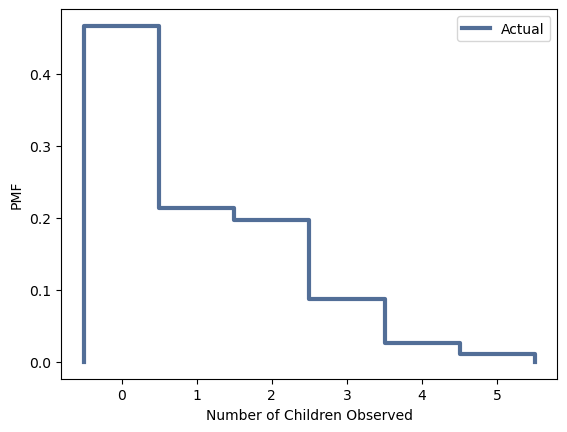

In [18]:
# Plot the actual distribution of the PMF of the NUMDKHH variable
# Labels are attached to the axes for better understanding and clarification of the plot

thinkplot.Pmf(actual_pmf)
thinkplot.Config(xlabel='Number of Children Observed', ylabel='PMF')

In [26]:
# Function must be defimed to convert the actual PMF to a biased PMF

def BiasedPmf(actual_pmf, label):
    
    # Create a copy of the actual PMF to manipulate into the biased PMF
    
    kids_resp_pmf = actual_pmf.Copy(label=label)
    
    # For loop to apply the bias factor to each PMF listed in the actual PMF distribution and save it to the new variable
    
    for x, value in actual_pmf.Items():
        kids_resp_pmf.Mult(x, x)
        
    # Normalize and return the variable so it can be used to properly plot the biased distribution
    
    kids_resp_pmf.Normalize()
    return kids_resp_pmf

In [29]:
# Construct biased PMF variable using NUMKDHH within ReadFemResp dataset to reflect 
# actual distribution for the number of children under 18 in the household

feels_like_pmf = BiasedPmf(actual_pmf, label='Biased')

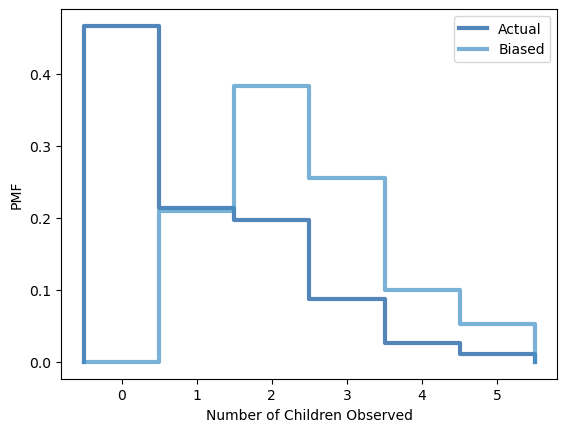

In [30]:
# Plot the biased distribution of the PMF of the NUMDKHH variable against the actual distribution
# Labels are attached to the axes for better understanding and clarification of the plot

thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, feels_like_pmf])
thinkplot.Config(xlabel='Number of Children Observed', ylabel='PMF')

In [31]:
# Computation of means for both actual and biased PMF distributions
# Both print statements will use f-strings for clean output

print(f'Actual distribution mean: {actual_pmf.Mean()}')
print(f'Biased distribution mean: {feels_like_pmf.Mean()}')


Actual distribution mean: 1.024205155043831
Biased distribution mean: 2.403679100664282


In [33]:
# Exercise 3-2

# Create the PmfMean function, which will take a PMF object as an argument

def PmfMean(pmf):
    
    # Mean variable is defined for transformation in the function
    
    mean = 0
    
    # For loop created to establish the mean formula encompassing all items in the PMF object (mean value is returned)
    
    for x, value in pmf.Items():
        mean += x * value
    return mean

# Function is called and used on the previously established PMF object actual_pmf

PmfMean(actual_pmf)

1.024205155043831

In [35]:
# Create the PmfVar function, which also needs to take a PMF object as an argument

def PmfVar(pmf):
    
    # Variance variable is defined to be transformed in the function
    # Mean_pmf_value variable is also defined to be used in the variance formula
    
    variance=0
    
    mean_pmf_value = PmfMean(actual_pmf)
    
    # For loop created to establish the variance formula encompassing all items in the PMF object 
    # using the Numpy library (variance value is returned)
    
    for x, value in pmf.Items():
        variance += value * np.power(x - mean_pmf_value, 2)
    return variance

# Function is called and used on the previously established PMF object actual_pmf

PmfVar(actual_pmf)

1.4128643263531195

In [40]:
# We must now check if the functions that have been created output values that
# match the built-in Mean and Var methods provided by Pmf

print(thinkstats2.Pmf.Mean(actual_pmf))

print(thinkstats2.Pmf.Var(actual_pmf))

1.024205155043831
1.4128643263531195


In [41]:
# If-else conditional statements can be written to verify that both methods produce the same results

# Mean conditional statement

if PmfMean(actual_pmf) == thinkstats2.Pmf.Mean(actual_pmf):
    print("True")
else:
    print("False")

True


In [42]:
# Variance conditional statement

if PmfVar(actual_pmf) == thinkstats2.Pmf.Var(actual_pmf):
    print("True")
else:
    print("False")

True


In [47]:
# Line of code taken from the book example file to establish the others dataframe to compute percentile rank
# using the others total weight distribution data as I am the middle child in my family

live, firsts, others = first.MakeFrames()

In [49]:
# Exercise 4-1

# My mother years ago had sent me a baby picture of me with my height 
# and weight when first born, and I weighed 7 pounds and 10 ounces

# PercentileRank function is taken from the book example file to compute and return percentile rank

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

# My_birth_weight variable created to capture my weight at birth

my_birth_weight = 7.625

# Line of code taken from the book example file to establish the CDF of the others distribution of total weight at birth

other_cdf = thinkstats2.Cdf(others.totalwgt_lb)

# Using the PercentileRank function in conjunction with the two defined variables, my percentile rank can be computed

other_cdf.PercentileRank(my_birth_weight)

# Output shows that I do not need to apologize to my mother

58.84491978609626

In [62]:
# Exercise 4-2

# The Numpy library allows us to generate random numbers from 0-1
# The size of the number distribution needs to be amended to generate 1000 random numbers

# Random_num_sample variable is created to hold these randomy generated numbers

random_num_sample = np.random.random(size=1000)

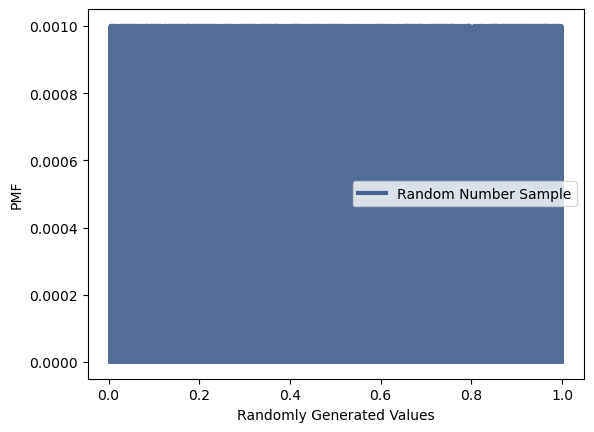

In [65]:
# Plot the PMF of the randomly generated numbers

# pmf_random_num variable is created to house the PMF distribution of numbers to be plotted

pmf_random_num = thinkstats2.Pmf(random_num_sample, label='Random Number Sample')

# Plotting the PMF distribution can be done with the Pmf() function included in the thinkplot library

thinkplot.Pmf(pmf_random_num)

# The Config() function allows the labeling of axes for the plotted distribution

thinkplot.Config(xlabel='Randomly Generated Values', ylabel='PMF')

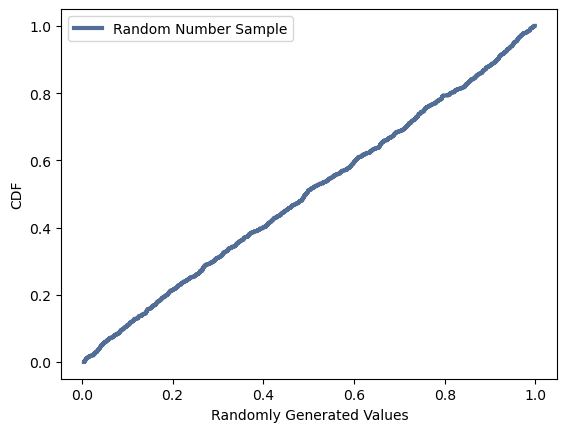

In [67]:
# Plot the CDF of the randomly generated numbers

# cdf_random_num variable is created to house the CDF distribution of numbers to be plotted

cdf_random_num = thinkstats2.Cdf(random_num_sample, label='Random Number Sample')

# Plotting the CDF distribution can be done with the Cdf() function included in the thinkplot library

thinkplot.Cdf(cdf_random_num)

# The Config() function allows the labeling of axes for the plotted distribution

thinkplot.Config(xlabel='Randomly Generated Values', ylabel='CDF')

In [ ]:
# The distribution of the randomly generated numbers is uniform, as the entire plane of the PMF plot was
# filled, meaning that the numbers were spread evenly. The line created by the CDF plot also increases at a consistent rate
# and is almost a completely straight line, further solidifying that the distribution is indeed uniform.